# **Mendeteksi Potensi Diabetes**

# **1. Perkenalan Dataset**


📘 Deskripsi Umum

Dataset Pima Indians Diabetes Database merupakan salah satu dataset paling populer di bidang machine learning untuk studi kasus prediksi penyakit diabetes. Dataset ini berisi data medis dari wanita keturunan Pima Indian yang berusia minimal 21 tahun dan tinggal di wilayah Arizona, Amerika Serikat.

Tujuan utama dataset ini adalah untuk memprediksi kemungkinan seseorang mengidap diabetes berdasarkan sejumlah parameter klinis dan fisiologis seperti jumlah kehamilan, tekanan darah, kadar glukosa, ketebalan kulit, dan lainnya.

Dataset ini sering digunakan dalam penelitian kesehatan, pengembangan model klasifikasi medis, dan pembelajaran algoritma machine learning untuk diagnosis penyakit.

📊 Informasi Dataset

- Sumber: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- Jumlah data: 768 baris (pasien)
- Jumlah fitur: 8 fitur input + 1 label output
- Tipe data: Numerik
- Tujuan: Klasifikasi biner (positif diabetes = 1, negatif diabetes = 0)

⚙️ Fitur dalam Dataset

1.	Pregnancies	Jumlah kehamilan yang pernah dialami
2. Glucose	Konsentrasi glukosa plasma setelah 2 jam dalam tes toleransi glukosa
3.	BloodPressure	Tekanan darah diastolik (mm Hg)
4.	SkinThickness	Ketebalan lipatan kulit trisep (mm)
5.	Insulin	Kadar insulin serum (μU/ml) setelah 2 jam
6.	BMI	Indeks massa tubuh = berat badan (kg) / (tinggi badan (m))²
7.	DiabetesPedigreeFunction	Skor fungsi riwayat keluarga terkait diabetes
8.	Age	Usia pasien (tahun)
9.	Outcome	Label target: 0 = tidak diabetes, 1 = diabetes

🎯 Tujuan Penggunaan

Tujuan dari penggunaan dataset ini adalah untuk membangun model klasifikasi yang dapat memprediksi kemungkinan seseorang menderita diabetes berdasarkan data kesehatan mereka.

Dengan model ini, diharapkan dapat membantu dalam:

- Mendeteksi dini risiko diabetes
- Membantu tenaga medis dalam pengambilan keputusan
- Mengembangkan sistem prediksi berbasis machine learning di bidang kesehatan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Machine Learning
from sklearn.linear_model import LogisticRegression   # algoritma klasifikasi logistik
from sklearn.tree import DecisionTreeClassifier       # algoritma Decision Tree
from sklearn.ensemble import RandomForestClassifier   # algoritma Random Forest (ensemble)
from sklearn.svm import SVC                           # Support Vector Machine

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **3. Memuat Dataset**

In [6]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Informasi Umum Dataset**

In [8]:
# Melihat tipe data dan nilai null
print("Informasi Dataset:")
df.info()

# Melihat Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek Missing Value
print("\nJumlah Missing Value:")
print(df.isnull().sum())

# Cek Data Duplicate
print("\nJumlah Data Duplicate:")
print(df.duplicated().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Statistik Deskriptif:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Jumlah Missing Value:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Jumlah Data Duplicate:
0


**Interpretasi**

Tidak terdapat missing value maupun data duplikat. tapi beberapa kolom memiliki nilai 0 yang tidak logis (misalnya tekanan darah 0 mmHg).

**Distribusi Label Target (Outcome)**

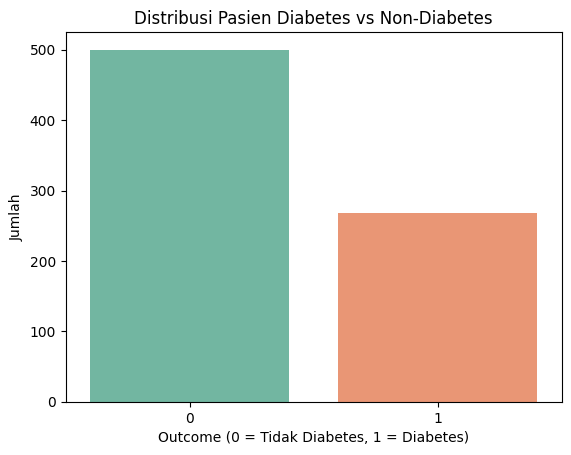

Persentase tiap kelas:
 Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [14]:
# Visualisasi distribusi target
sns.countplot(x='Outcome', data=df, hue='Outcome', palette='Set2', legend=False)
plt.title("Distribusi Pasien Diabetes vs Non-Diabetes")
plt.xlabel("Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
plt.ylabel("Jumlah")
plt.show()

# Persentase per kelas
persentase = df['Outcome'].value_counts(normalize=True) * 100
print("Persentase tiap kelas:\n", persentase)

**Interpretasi**

Distribusi label agak tidak seimbang, sehingga dapat dipertimbangkan melakukan *data balancing* sebelum modeling

**Distribusi Setiap Fitur**

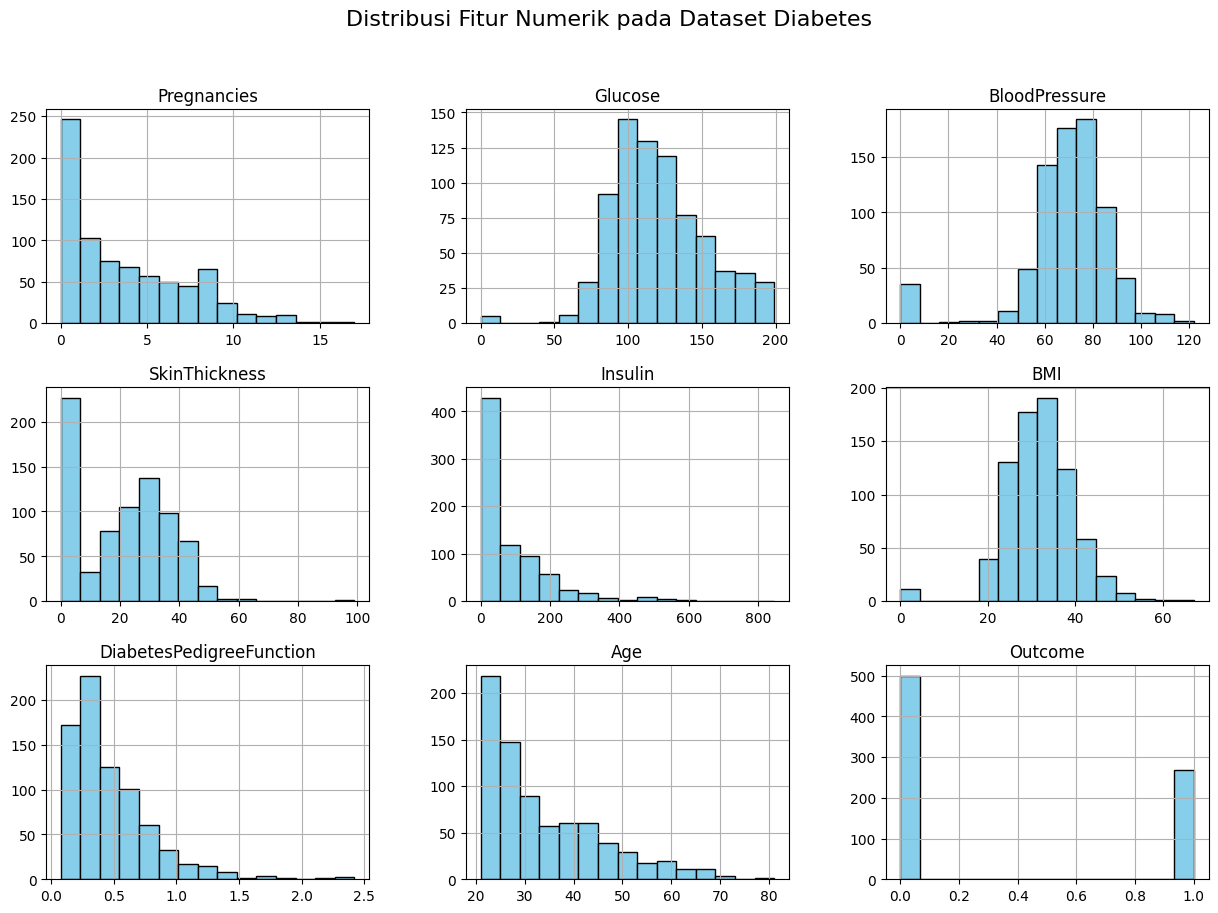

In [15]:
# Visualisasi distribusi tiap fitur numerik
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik pada Dataset Diabetes", fontsize=16)
plt.show()

**Korelasi Antar Fitur**

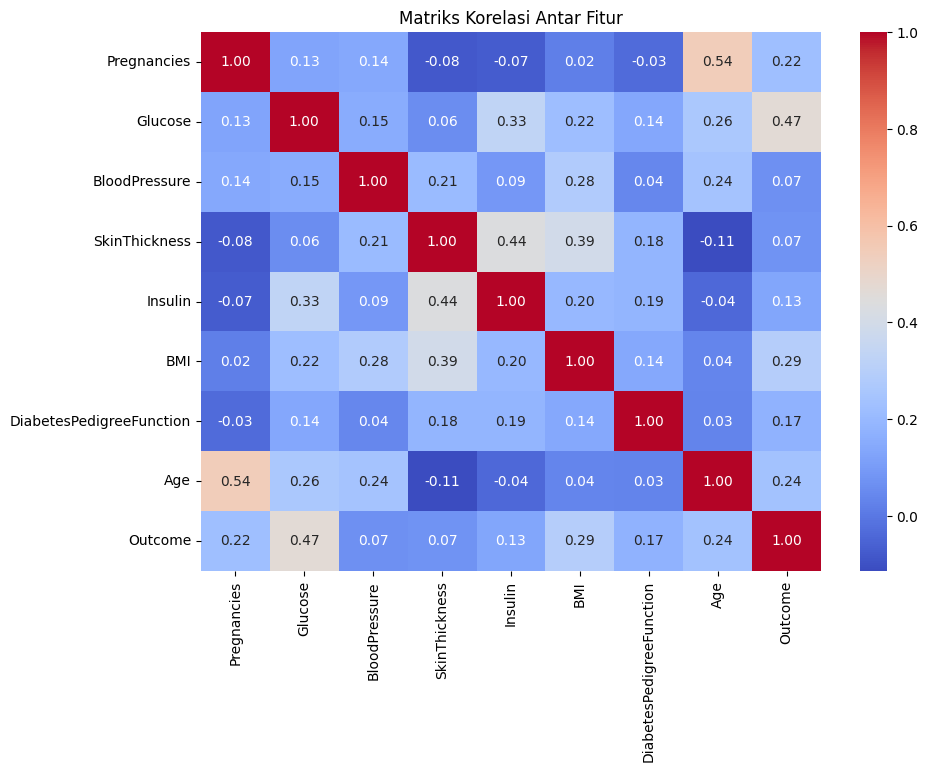

In [19]:
# hitung korelasi
corr = df.corr()

# visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()


**Interpretasi**

Nilai yang mendekati 1 atau -1 adalah fitur berkolerasi kuat. Fitur Glukosa berkolerasi tinggi (0.44) dengan fitur Outcome, menandakan glukosa darah merupakan indikator penting diabetes.

**Analisis Outlier**

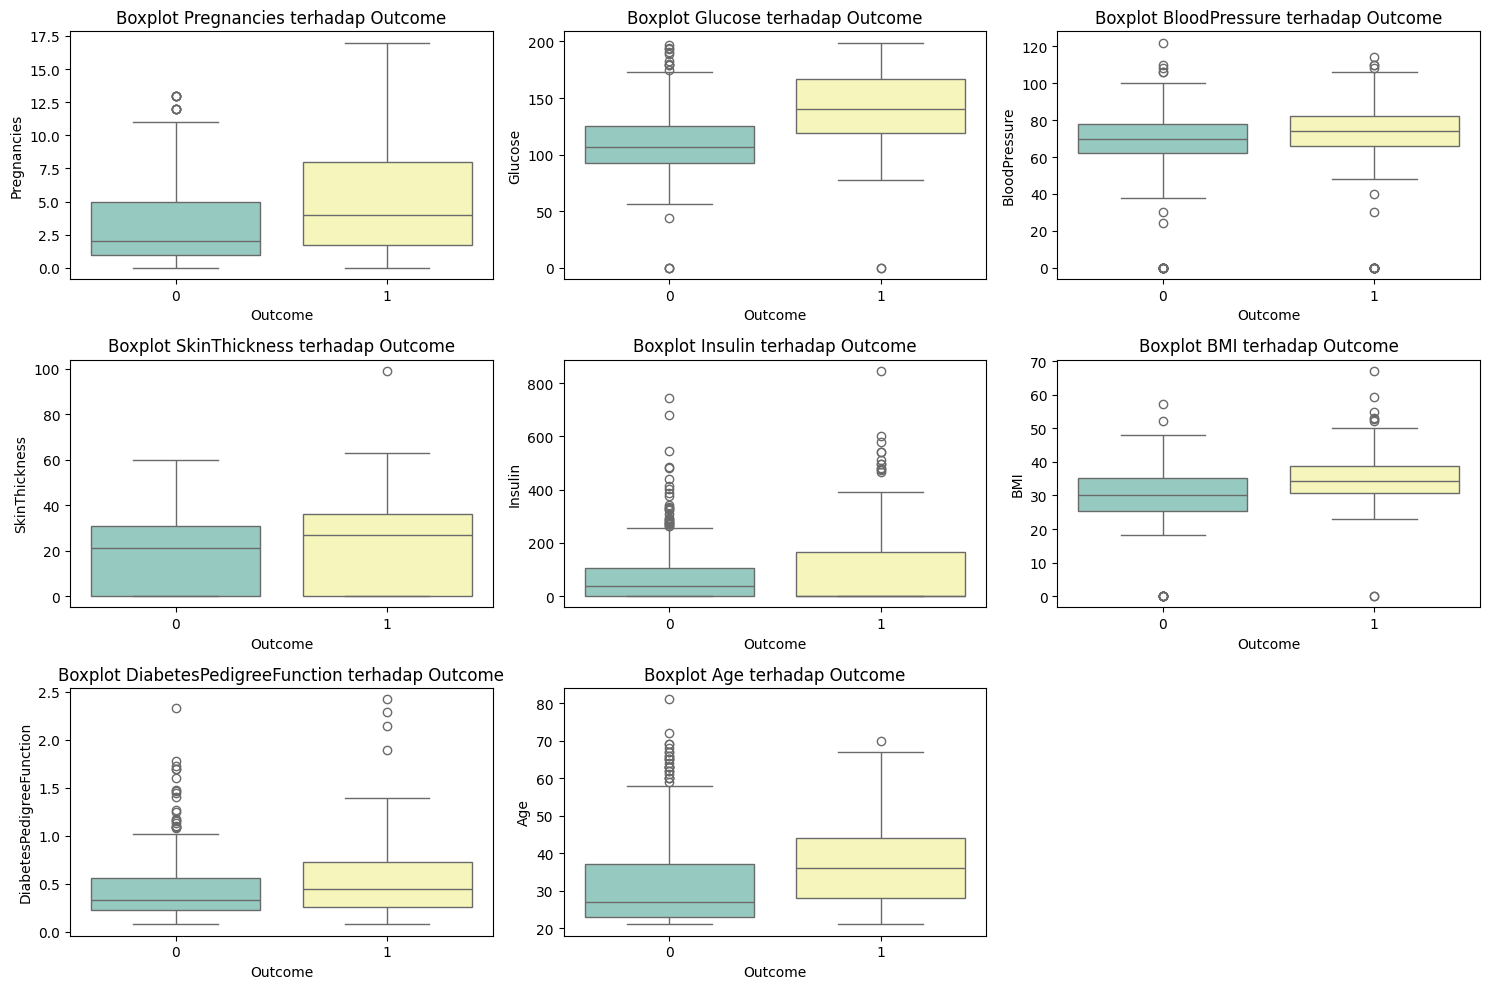

In [25]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
  plt.subplot(3, 3, i+1)
  sns.boxplot(data=df, x='Outcome', y=col, hue='Outcome', palette='Set3', legend=False)
  plt.title(f'Boxplot {col} terhadap Outcome')
plt.tight_layout()
plt.show()

**Interpretasi**

Terdapat outlier hampir di semua fitur, namun nilai ekstrem ada pada fitur-fitur seperti Insuline, Age, BMI, DiabetesPedigreeFunction. Outlier ini bisa mempengaruhi performa model jika tidak ditangani dengan baik.

# **5. Data Preprocessing**

**Menangani  nilai `0` tidak logis**

In [28]:
# kolom yang tidak seharusnya memiliki nilai 0
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# ganti nilai `0` dengan median
for col in cols_with_zero:
  median_value = df[col].median()
  df[col] = df[col].replace(0, median_value)

# print("\nJumlah nilai 0 setelah perbaikan:")
# print((df[cols_with_zero] == 0).sum())
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


**Menangani Outliers**

In [33]:
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] > upper, upper,
                          np.where(df[column] < lower, lower, df[column]))
  return df

for col in df.columns[:-1]:
  df = handle_outliers(df, col)


**Standarisasi fitur**

In [35]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



**Data balancing (SMOTE)**

In [38]:
from imblearn.over_sampling import SMOTE

print("\nSebelum SMOTE:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("\nSetelah SMOTE:")
print(y_resampled.value_counts())


Sebelum SMOTE:
Outcome
0    500
1    268
Name: count, dtype: int64

Setelah SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


**Dataset setelah Preprocessing (final)**

In [41]:
df_final = pd.concat([X_resampled, y_resampled], axis=1)
print("\nDataset setelah Preprocessing", df_final.shape)
df_final


Dataset setelah Preprocessing (1000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.866045,-0.030632,0.933847,-0.729820,0.181733,0.588927,1.445691,1
1,-0.848970,-1.205066,-0.543914,0.223108,-0.729820,-0.868800,-0.378101,-0.189304,0
2,1.245598,2.016662,-0.715008,-0.487630,-0.729820,-1.364051,0.746595,-0.103252,1
3,-0.848970,-1.073567,-0.543914,-0.487630,0.103101,-0.643686,-1.022787,-1.049828,0
4,-1.148194,0.504422,-2.768136,0.933847,1.073750,1.607456,2.596563,-0.017199,1
...,...,...,...,...,...,...,...,...,...
995,1.126638,0.712734,-0.234692,-0.487630,-0.729820,-0.072481,-0.504501,0.396482,1
996,-0.084841,-0.626896,-0.333214,-0.117563,-0.729820,-0.085180,-0.987516,-0.419733,1
997,-0.123216,1.863466,0.985044,-0.013804,1.058654,0.465541,2.345951,1.636101,1
998,-0.266622,0.198972,1.625073,2.174453,0.928638,0.580144,1.735249,-0.117142,1


In [43]:
# simpan format csv
save_to_csv = df_final.to_csv('diabetes_final.csv', index=False)